<a href="https://colab.research.google.com/github/pscabral/Prezunic/blob/main/ModeloVGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset

Cloning into 'Fruit-Images-Dataset'...
remote: Enumerating objects: 385858, done.
remote: Counting objects: 100% (8693/8693), done.
remote: Compressing objects: 100% (8659/8659), done.
remote: Total 385858 (delta 37), reused 8688 (delta 34), pack-reused 377165
Receiving objects: 100% (385858/385858), 2.10 GiB | 21.58 MiB/s, done.
Resolving deltas: 100% (1197/1197), done.
Updating files: 100% (90503/90503), done.


In [2]:
import os

# Diretório raiz
root_directory = '/content/Fruit-Images-Dataset/Validation'

# Lista de subpastas
subfolders = [
    'apple_6',
    'apple_braeburn_1',
    'apple_crimson_snow_1',
    'apple_golden_1',
    'apple_golden_2',
    'apple_golden_3',
    'apple_granny_smith_1',
    'apple_hit_1',
    'apple_pink_lady_1',
    'apple_red_1',
    'apple_red_2',
    'apple_red_3',
    'apple_red_delicious_1',
    'apple_red_yellow_1',
    'apple_rotten_1',
    'cabbage_white_1',
    'carrot_1',
    'cucumber_1',
    'cucumber_3',
    'eggplant_violet_1',
    'pear_1',
    'pear_3',
    'zucchini_1',
    'zucchini_dark_1'
]

# Crie a estrutura de pastas
for folder in subfolders:
    folder_path = os.path.join(root_directory, folder)
    os.makedirs(folder_path, exist_ok=True)

In [ ]:
# Importe as bibliotecas necessárias
import numpy as np  # Importa a biblioteca NumPy para cálculos de álgebra linear
import pandas as pd  # Importa a biblioteca Pandas para manipulação de dados, incluindo leitura de arquivos CSV

# Os dados de entrada estão disponíveis no diretório somente leitura "/content/Fruit-Images-Dataset"
# Por exemplo, executar isto (clicando em Executar ou pressionando Shift+Enter) listará todos os arquivos no diretório de entrada

import os  # Importa a biblioteca os, que permite interagir com o sistema de arquivos
for dirname, _, filenames in os.walk('/content/Fruit-Images-Dataset'):
    for filename in filenames:
        # Combina o diretório e o nome do arquivo para obter o caminho completo do arquivo
        print(os.path.join(dirname, filename))

In [5]:
# Importando as bibliotecas necessárias
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from glob import glob
from keras.applications.vgg16 import VGG16

# Definindo um gerador de dados de imagem (ImageDataGenerator)
# que será usado para aumentar o conjunto de dados de imagens.
datagen = ImageDataGenerator(rescale=1./255)

# Definindo os caminhos para os diretórios de treinamento e teste
train_dir = '/content/Fruit-Images-Dataset/Training'
test_dir = '/content/Fruit-Images-Dataset/Test'

# Configurando um gerador de dados para o conjunto de treinamento
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Tamanho desejado das imagens (pode ser ajustado)
    batch_size=32,
    class_mode='categorical'  # Modo de classificação
)

# Configurando um gerador de dados para o conjunto de teste
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Tamanho desejado das imagens (pode ser ajustado)
    batch_size=32,
    class_mode='categorical'  # Modo de classificação
)

# Criando um modelo sequencial
model = Sequential()

# Carregando o modelo pré-treinado VGG16
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Adicionando a parte do modelo VGG16 ao modelo sequencial
model.add(vgg_model)

# Adicionando camadas personalizadas ao modelo sequencial
model.add(Dense(units=131, activation='relu'))  # Modifique o número de unidades de acordo com sua necessidade

# Adicionando camada de saída com ativação softmax
number_of_classes = 131  # Substitua 131 pelo número real de classes
model.add(Dense(units=number_of_classes, activation='softmax'))

# Compilando o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [6]:
# Caminho para o diretório de treinamento das imagens
train_path = "../content/Fruit-Images-Dataset/Training"

# Caminho para o diretório de teste das imagens
test_path = "../content/Fruit-Images-Dataset/Test"

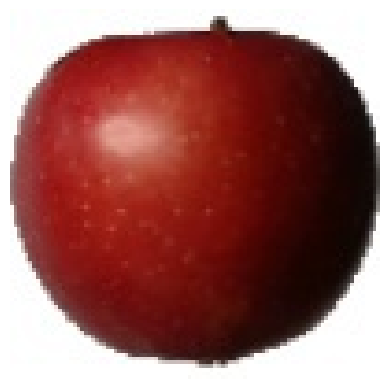

In [7]:
# Carrega uma imagem de exemplo do diretório de treinamento (no caso, uma maçã da variedade 'Apple Braeburn')
img = load_img(train_path + '/Apple Braeburn/101_100.jpg')

# Configura a plotagem da imagem
plt.axis('off')  # Desativa a exibição dos eixos (sem marcações)
plt.imshow(img)  # Exibe a imagem carregada

In [8]:
# Converte a imagem carregada em um array
x = img_to_array(img)

# Exibe a forma (shape) do array resultante
print(x.shape)

(100, 100, 3)


In [9]:
# Obtém a lista de diretórios no diretório de treinamento, onde cada diretório representa uma classe
lista_de_classes = glob(train_path + '/*')

# Calcula o número de classes no conjunto de dados de treinamento
numero_de_classes = len(lista_de_classes)

# Exibe o número de classes
numero_de_classes

131

In [10]:
# Cria uma instância do modelo VGG16
vgg = VGG16()

In [ ]:
# Imprime um resumo da arquitetura do modelo VGG16
print(vgg.summary())

In [12]:
# Obtém a lista de camadas do modelo VGG16
vgg_layer_list = vgg.layers

# Imprime a lista de camadas
print(vgg_layer_list)

[<keras.src.engine.input_layer.InputLayer object at 0x7dd060b22e30>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dd08bbd6740>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dcffa4fb520>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7dcffa4fbc40>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dcffa4fb910>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dcffa358cd0>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7dcffa35a530>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dcffa35acb0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dcffa35b250>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dcffa35ba30>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7dcffa368340>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dcffa35bb50>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dcffa3693f0>, <keras.src.layers.convolutional.co

In [13]:
# Calcula e imprime o número de camadas no modelo VGG16
numero_de_camadas = len(vgg_layer_list)
print("Número de camadas no modelo VGG16:", numero_de_camadas)

Número de camadas no modelo VGG16: 23


In [14]:
# Cria um modelo sequencial vazio
model = Sequential()

# Itera através das camadas do modelo VGG16 (exceto a última)
for i in range(len(vgg_layer_list) - 1):
    # Adiciona a camada atual à arquitetura do modelo sequencial
    model.add(vgg_layer_list[i])

In [ ]:
# Imprime um resumo da arquitetura do modelo sequencial criado
print(model.summary())

In [16]:
#caso precisa volar a anterior
# Itera sobre todas as camadas do modelo e define cada camada como não treinável.
#for layer in model.layers:
# layer.trainable = False
# Adiciona uma nova camada densa de saída com ativação softmax para classificar os dados em 'numberOfClass' classes.
#model.add(Dense(numberOfClass, activation="softmax"))

numberOfClass = 131  # Substitua 131 pelo número real de classes

# Adicione uma nova camada densa de saída com ativação softmax para as 131 classes
model.add(Dense(numberOfClass, activation="softmax"))

# Congele as camadas existentes do modelo, tornando-as não treináveis
for camada in model.layers:
    camada.trainable = False

In [17]:
# Exibe um resumo do modelo, incluindo informações sobre suas camadas, parâmetros e arquitetura.
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [18]:
# Compila o modelo com a função de perda 'categorical_crossentropy', o otimizador 'rmsprop' e métricas de avaliação de 'accuracy'.
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [19]:
# Configura o gerador de dados de treinamento a partir do diretório 'train_path' e define o tamanho alvo das imagens como (224,224).
train_data = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224))

# Configura o gerador de dados de teste a partir do diretório 'test_path' e define o tamanho alvo das imagens como (224,224).
test_data = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224))

# Define o tamanho do lote (batch size) como 32 para o treinamento do modelo.
batch_size = 32

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [20]:
# Treina o modelo usando o gerador de dados de treinamento 'train_data' e define os seguintes parâmetros:
# - steps_per_epoch: Número de etapas por época, que é calculado como 1600 dividido pelo tamanho do lote (batch_size).
# - epochs: Número total de épocas de treinamento, neste caso, 25 épocas.
# - validation_data: Utiliza o gerador de dados de teste 'test_data' para validação.
# - validation_steps: Número de etapas de validação por época, calculado como 800 dividido pelo tamanho do lote (batch_size).
hist = model.fit(train_data,
                 steps_per_epoch=1600 // batch_size,
                 epochs=2,
                 validation_data=test_data,
                 validation_steps=800 // batch_size)

Epoch 1/2
50/50 [==============================] - 1470s 30s/step - loss: 7.6740 - accuracy: 0.0106 - val_loss: 7.4700 - val_accuracy: 0.0188
Epoch 2/2
50/50 [==============================] - 1450s 29s/step - loss: 7.7472 - accuracy: 0.0100 - val_loss: 7.3984 - val_accuracy: 0.0162


In [21]:
# Salva os pesos do modelo no diretório '/content/' com o nome 'deneme.h5'.
model.save_weights('/content/deneme.h5')

In [22]:
# Imprime as chaves disponíveis no dicionário hist.history, que contém informações de treinamento do modelo.
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


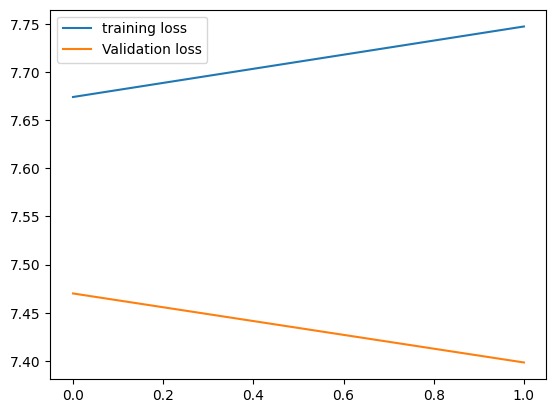

In [23]:
# Plota as curvas de perda do treinamento e validação.
plt.plot(hist.history['loss'], label="training loss")
plt.plot(hist.history['val_loss'], label="Validation loss")
plt.legend()  # Adiciona uma legenda ao gráfico
plt.show()  # Exibe o gráfico

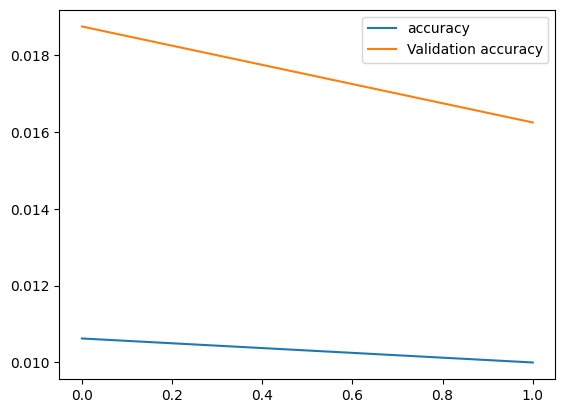

In [24]:
# Plota as curvas de precisão do treinamento e validação.
plt.plot(hist.history['accuracy'], label="accuracy")
plt.plot(hist.history['val_accuracy'], label="Validation accuracy")
plt.legend()  # Adiciona uma legenda ao gráfico
plt.show()  # Exibe o gráfico

In [25]:
# Salva o histórico de treinamento no diretório '/content/' com o nome 'deneme.json' em formato JSON.
import json, codecs
with open('/content/deneme.json', 'w') as f:
    json.dump(hist.history, f)